# Data Challenge

### A business question we ran into

We sometimes run a/b tests. the main difficulty we face in doing this is, __we sometimes do not know what to do and how to interpret results.__

For instance:
If we have 100 participants in our test group and 98 of those are converting towards a certain goal, while we also have 100 participants in our control group and of those we see only 10 users converting, it is very clear: we should go for the test.

But in real life it unfortunatelly is not always that obvious...
We sometimes do not really know if a result is meaningful or not. This is, what this test is about.

We conducted an a/b-test about recommendation sliders we implemented. __Now we want to know what the test results tell us.__ 

We will go through everything in detail in the next steps.


### Import everything that is necessary in this section

You don't have to do it now. You can also do it later. __But please put everything you import here.__

In [49]:
#import your stuff below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

### Reading csv

__Please start here__
The name of the csv file is 'ga_data_rndm.csv'
It shows randomized sample data from our google analytics account.

In [2]:
df = pd.read_csv('ga_data_rndm.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,ga:date,ga:deviceCategory,ga:dimension13,ga:pageviews,ga:sessions,ga:transactionRevenue,ga:transactions,ga:uniquePageviews
0,0,0,20190101,desktop,"Technical 50-50 AA-T:0,Recommendation Slide:0,...",20471.0,3688.0,5752.689219,16.0,15230
1,1,1,20190101,mobile,"Technical 50-50 AA-T:0,Recommendation Slide:0,...",55935.0,11187.0,13608.661484,63.0,38746
2,2,2,20190101,tablet,"Technical 50-50 AA-T:0,Recommendation Slide:0,...",16573.0,2857.0,1888.473350,16.0,11914
3,3,3,20190102,desktop,"Technical 50-50 AA-T:0,Recommendation Slide:0,...",35192.0,5426.0,1974.257458,16.0,25681
4,4,4,20190102,mobile,"Technical 50-50 AA-T:0,Recommendation Slide:0,...",62595.0,11332.0,16585.946557,24.0,42533


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 10 columns):
Unnamed: 0               763 non-null int64
Unnamed: 0.1             763 non-null int64
ga:date                  763 non-null int64
ga:deviceCategory        763 non-null object
ga:dimension13           763 non-null object
ga:pageviews             763 non-null float64
ga:sessions              763 non-null float64
ga:transactionRevenue    763 non-null float64
ga:transactions          763 non-null float64
ga:uniquePageviews       763 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 59.7+ KB


In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ga:date', 'ga:deviceCategory',
       'ga:dimension13', 'ga:pageviews', 'ga:sessions',
       'ga:transactionRevenue', 'ga:transactions', 'ga:uniquePageviews'],
      dtype='object')

In [6]:
df.shape

(763, 10)

### Explanations on the dataframe

__dimension13 indicates the testgroups the users were in.__

__Recommendation Slide:0  always means control group__

__Recommendation Slide:1  always means test group__

If there is no 'Recommendation Slide' in dimension13 it means, the users did not participate in the test. If there are also other strings in dimension13 (like "Second Technical 50:0" or something) those values indicate other tests that ran at the same time. But we are not interested in the results of those tests?


In short: In other groups, beside 'Recommendation Slide', we are not interested.

In [12]:
df['ga:dimension13'].unique()

array(['Technical 50-50 AA-T:0,Recommendation Slide:0,Second Technical 50-:0',
       'Technical 50-50 AA-T:0,Recommendation Slide:0,Second Technical 50-:1',
       'Technical 50-50 AA-T:0,Recommendation Slide:1,Second Technical 50-:0',
       'Technical 50-50 AA-T:0,Recommendation Slide:1,Second Technical 50-:1',
       'Technical 50-50 AA-T:0,Second Technical 50-:0',
       'Technical 50-50 AA-T:0,Second Technical 50-:1',
       'Technical 50-50 AA-T:1,Recommendation Slide:0,Second Technical 50-:0',
       'Technical 50-50 AA-T:1,Recommendation Slide:0,Second Technical 50-:1',
       'Technical 50-50 AA-T:1,Recommendation Slide:1,Second Technical 50-:0',
       'Technical 50-50 AA-T:1,Recommendation Slide:1,Second Technical 50-:1',
       'Technical 50-50 AA-T:1,Second Technical 50-:0',
       'Technical 50-50 AA-T:1,Second Technical 50-:1'], dtype=object)

In [10]:
df['control'] = 0

In [13]:
def f(x):
    if 'Recommendation Slide:0' in x.split(','):
        return 1
    return 0
df['control'] = df['ga:dimension13'].apply(f)

In [14]:
df['control'].unique()

array([1, 0])

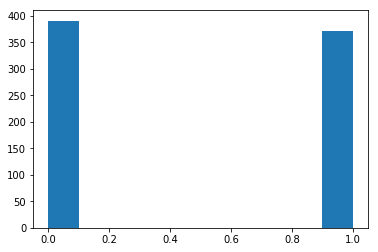

In [23]:
plt.hist(df['control'].tolist())
plt.show()

In [ ]:
df['test'] = 0

In [15]:
def f(x):
    if 'Recommendation Slide:1' in x.split(','):
        return 1
    return 0
df['test'] = df['ga:dimension13'].apply(f)

In [16]:
df['test'].unique()

array([0, 1])

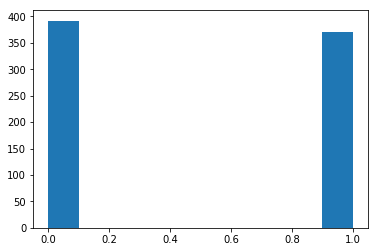

In [24]:
plt.hist(df['test'].tolist())
plt.show()

In [37]:
df_test = df[df['test'] == 1]

In [38]:
df_control = df[df['control'] == 1]

In [39]:
df_test.shape

(371, 12)

In [40]:
df_control.shape

(372, 12)

In [68]:
df_test[df_test['control'] == 1]

,Unnamed: 0,Unnamed: 0.1,ga:date,ga:deviceCategory,ga:dimension13,ga:pageviews,ga:sessions,ga:transactionRevenue,ga:transactions,ga:uniquePageviews,control,test


In [69]:
df_control[df_control['test'] == 1]

,Unnamed: 0,Unnamed: 0.1,ga:date,ga:deviceCategory,ga:dimension13,ga:pageviews,ga:sessions,ga:transactionRevenue,ga:transactions,ga:uniquePageviews,control,test


Same number of participants in the two groups 

## Invistigate 'ga:pageviews'

In [47]:
print(df_test['ga:pageviews'].sum())
print(df_test['ga:pageviews'].mean())
print(df_test['ga:pageviews'].std())
print(df_test['ga:pageviews'].min())
print(df_test['ga:pageviews'].max())

9496535.0
25597.12938005391
15128.132813975071
16.0
68540.0


In [48]:
print(df_control['ga:pageviews'].sum())
print(df_control['ga:pageviews'].mean())
print(df_control['ga:pageviews'].std())
print(df_control['ga:pageviews'].min())
print(df_control['ga:pageviews'].max())

9623273.0
25869.013440860213
15361.45329832033
16.0
73877.0


       test-pageviews
count      371.000000
mean     25597.129380
std      15128.132814
min         16.000000
25%      14853.500000
50%      23031.000000
75%      34468.000000
max      68540.000000


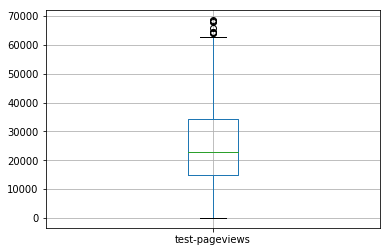

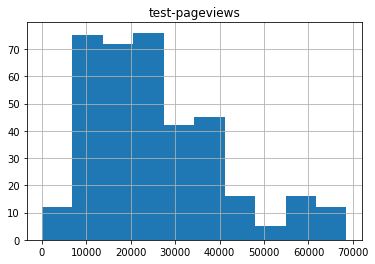

In [64]:
results = pd.DataFrame()
results['test-pageviews'] = df_test['ga:pageviews'].tolist()
#results['test-pageviews'] = df.loc[df['test']==1,'ga:pageviews'].tolist()
#results['control-pageviews'] = df.loc[df['control']==1,'ga:pageviews'].tolist()
# descriptive stats
print(results.describe())
# box and whisker plot
results.boxplot()
pyplot.show()
# histogram
results.hist()
pyplot.show()

       control-pageviews
count         372.000000
mean        25869.013441
std         15361.453298
min            16.000000
25%         15319.750000
50%         23248.000000
75%         34126.000000
max         73877.000000


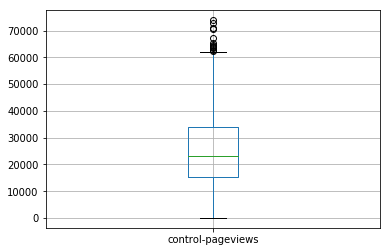

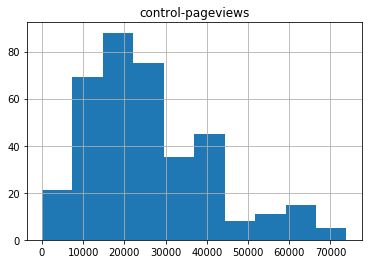

In [63]:
# load results file
results = pd.DataFrame()
#results['test-pageviews'] = df.loc[df['test']==1,'ga:pageviews'].tolist()
#results['control-pageviews'] = df.loc[df['control']==1,'ga:pageviews'].tolist()
results['control-pageviews'] = df_control['ga:pageviews'].tolist()
# descriptive stats
print(results.describe())
# box and whisker plot
results.boxplot()
pyplot.show()
# histogram
results.hist()
pyplot.show()

Compare Means for Non-Gaussian Results:
We cannot use the Student t-test or the Welch’s t-test if our data is not Gaussian.
An alternative statistical significance test we can use for non-Gaussian data is called the Kolmogorov-Smirnov test.
In SciPy, this is called the ks_2samp() function.
"This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution."

In [65]:
len(df_test['ga:pageviews'].tolist())

371

In [66]:
len(df_control['ga:pageviews'].tolist())

372

In [70]:
from scipy.stats import ks_2samp

# calculate the significance
value, pvalue = ks_2samp(df_test['ga:pageviews'], df_control['ga:pageviews'])
print(value, pvalue)
if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

0.03453322899458022 0.9776952180520176
Samples are likely drawn from the same distributions (fail to reject H0)


## Investigate 'ga:sessions'

In [71]:
print(df_test['ga:sessions'].sum())
print(df_test['ga:sessions'].mean())
print(df_test['ga:sessions'].std())
print(df_test['ga:sessions'].min())
print(df_test['ga:sessions'].max())

1836075.0
4948.989218328841
3116.9869191155594
15.0
13062.0


In [72]:
print(df_control['ga:sessions'].sum())
print(df_control['ga:sessions'].mean())
print(df_control['ga:sessions'].std())
print(df_control['ga:sessions'].min())
print(df_control['ga:sessions'].max())

1845752.0
4961.698924731183
3149.706899588309
15.0
13290.0


        ga:sessions
count    371.000000
mean    4948.989218
std     3116.986919
min       15.000000
25%     2641.000000
50%     4123.000000
75%     6428.500000
max    13062.000000


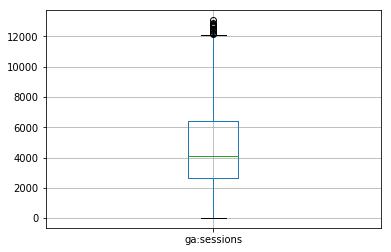

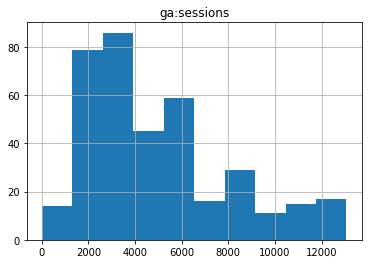

In [73]:
results = pd.DataFrame()
results['ga:sessions'] = df_test['ga:sessions'].tolist()
#results['test-pageviews'] = df.loc[df['test']==1,'ga:pageviews'].tolist()
#results['control-pageviews'] = df.loc[df['control']==1,'ga:pageviews'].tolist()
# descriptive stats
print(results.describe())
# box and whisker plot
results.boxplot()
pyplot.show()
# histogram
results.hist()
pyplot.show()

        ga:sessions
count    372.000000
mean    4961.698925
std     3149.706900
min       15.000000
25%     2568.250000
50%     4035.500000
75%     6462.500000
max    13290.000000


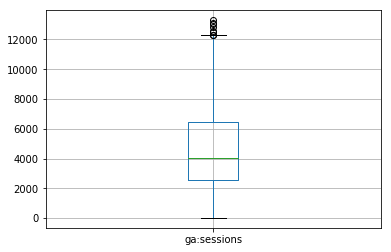

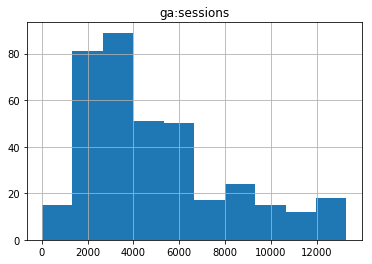

In [74]:
results = pd.DataFrame()
results['ga:sessions'] = df_control['ga:sessions'].tolist()
#results['test-pageviews'] = df.loc[df['test']==1,'ga:pageviews'].tolist()
#results['control-pageviews'] = df.loc[df['control']==1,'ga:pageviews'].tolist()
# descriptive stats
print(results.describe())
# box and whisker plot
results.boxplot()
pyplot.show()
# histogram
results.hist()
pyplot.show()

In [75]:
from scipy.stats import ks_2samp

# calculate the significance
value, pvalue = ks_2samp(df_test['ga:pageviews'], df_control['ga:pageviews'])
print(value, pvalue)
if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

0.03453322899458022 0.9776952180520176
Samples are likely drawn from the same distributions (fail to reject H0)


## Investigate 'ga:transactionRevenue'

       ga:transactionRevenue
count             371.000000
mean            10158.633272
std             11995.603188
min                 0.000000
25%              1241.117824
50%              6385.674597
75%             14417.102441
max             72329.018516


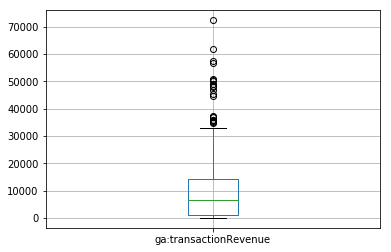

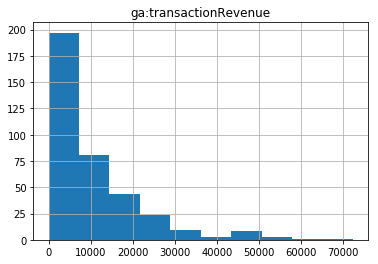

In [76]:
results = pd.DataFrame()
results['ga:transactionRevenue'] = df_test['ga:transactionRevenue'].tolist()
# descriptive stats
print(results.describe())
# box and whisker plot
results.boxplot()
pyplot.show()
# histogram
results.hist()
pyplot.show()

       ga:transactionRevenue
count             372.000000
mean            10206.901428
std             11889.046316
min                 0.000000
25%              1106.588776
50%              7088.108412
75%             14887.473648
max             68069.951155


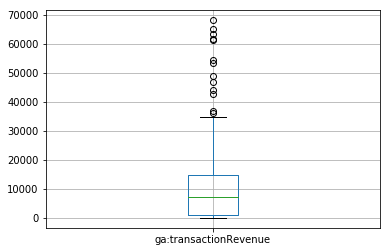

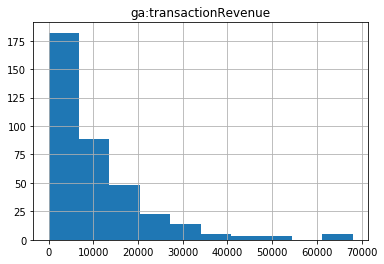

In [77]:
results = pd.DataFrame()
results['ga:transactionRevenue'] = df_control['ga:transactionRevenue'].tolist()
# descriptive stats
print(results.describe())
# box and whisker plot
results.boxplot()
pyplot.show()
# histogram
results.hist()
pyplot.show()

In [78]:
from scipy.stats import ks_2samp

# calculate the significance
value, pvalue = ks_2samp(df_test['ga:pageviews'], df_control['ga:pageviews'])
print(value, pvalue)
if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

0.03453322899458022 0.9776952180520176
Samples are likely drawn from the same distributions (fail to reject H0)


## Investigate 'ga:transactions'

# Please help us making sense out of this data

After exploring the data:
What can you tell us by looking at the data? What conclusions do you have?

__What does this mean for us and our test?__

__Especially with regards to our test: What should we do and how should we proceed?__

__Is there anything specific with regards to device categories?__

__Any other things you noticed or found interesting?__

Please back your findings with visualisations and aggregated tables


Good luck! 
We are very excited to discuss the findings you have with you.